# Assignment I

2.2 Implement the calculation of a matrix-matrix multiplication A*B = C, where A, B, and C are NxN matrices using Python using 1) loops (naive implementation) 2) using np.matmul from NumPy

In [1]:
# First Naive Implementation of the algorithm
import numpy as np
import matplotlib.pyplot as plt
import time as time

def RandomMatrix(Nrows, Ncols):
    return np.random.rand(Nrows, Ncols)

2.2 - 1) What is the mathematical complexity of calculating matrix-matrix multiply of two matrices of size NxN? O(1), or O(N), or O(N^2), or O(N^3) or O(N^4) or O(Nlog(n))?  Plot the execution time, varying N, and superimpose the expected complexity.

In [2]:
def MatrixMultiplication_Naive(A, B, diagnostic = True):
    Nrows = len(A)
    Ncols = len(B[0])
    C = np.zeros((Nrows, Ncols))
    time1 = time.time()
    B_trans = list(zip(*B))

    for i in range(Nrows):
        for j in range(Ncols):
            temp_sum = 0
            for a_ik, b_kj in zip(A[i], B_trans[j]):
                temp_sum += a_ik * b_kj
            C[i][j] = temp_sum
    time2 = time.time()
    if diagnostic:
        print(f"Nr = {Nrows}, Nc = {Ncols} \t Time taken for the multiplication is: {time2 - time1}")
    return C, time2 - time1

In [3]:
def MatrixMultiplication_NumPy(A, B, diagnostic = True):
    Nrows = A.shape[0]
    Ncols = B.shape[1]
    time1 = time.time()
    C = np.matmul(A,B)
    time2 = time.time()
    if diagnostic:
        print(f"Nr = {Nrows}, Nc = {Ncols} \t Time taken for the multiplication is: {time2-time1}")
    return C, time2-time1

In [4]:
def Time_by_Size(func, N, diagnostic = True):
    "Time taken by the function by varying the size of the matrix"
    A = [RandomMatrix(Nval, Nval) for Nval in N]
    B = [RandomMatrix(Nval, Nval) for Nval in N]
    time_by_n = []
    for i in range(len(N)):
        _, time1 = func(A[i], B[i], diagnostic)
        time_by_n.append(time1)
    return np.array(time_by_n)

In [5]:
N = [64, 128, 256, 512, 1024, 2048]
time_by_n_numpy = Time_by_Size(MatrixMultiplication_NumPy, N)
time_by_n_naive = Time_by_Size(MatrixMultiplication_Naive, N)

Nr = 64, Nc = 64 	 Time taken for the multiplication is: 5.1021575927734375e-05
Nr = 128, Nc = 128 	 Time taken for the multiplication is: 0.00023603439331054688
Nr = 256, Nc = 256 	 Time taken for the multiplication is: 0.0006279945373535156
Nr = 512, Nc = 512 	 Time taken for the multiplication is: 0.0037729740142822266
Nr = 1024, Nc = 1024 	 Time taken for the multiplication is: 0.021299362182617188
Nr = 2048, Nc = 2048 	 Time taken for the multiplication is: 0.16945099830627441
Nr = 64, Nc = 64 	 Time taken for the multiplication is: 0.040345191955566406
Nr = 128, Nc = 128 	 Time taken for the multiplication is: 0.18994522094726562
Nr = 256, Nc = 256 	 Time taken for the multiplication is: 1.2272961139678955
Nr = 512, Nc = 512 	 Time taken for the multiplication is: 9.569245100021362
Nr = 1024, Nc = 1024 	 Time taken for the multiplication is: 74.9038782119751
Nr = 2048, Nc = 2048 	 Time taken for the multiplication is: 2081.0028517246246


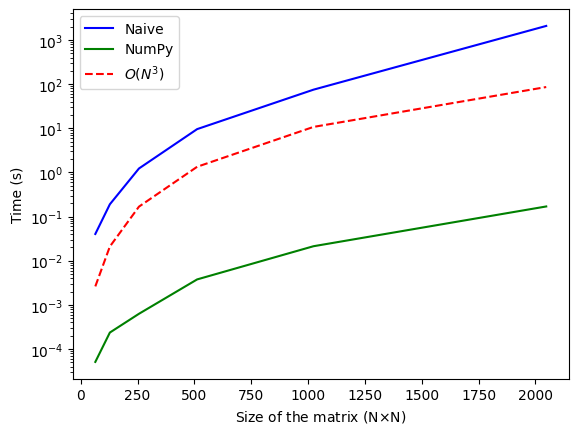

In [6]:
fig, ax = plt.subplots()
ax.plot(N, time_by_n_naive, label = "Naive", color = "blue")
ax.plot(N, time_by_n_numpy, label = "NumPy", color = "green")
ax.plot(N, (np.array(N)**3)*1e-8, label = r"$O(N^3)$", color = "red", linestyle = "--")
ax.set_yscale("log")
ax.set_xlabel(r"Size of the matrix (N$\times$N)")
ax.set_ylabel("Time (s)")
ax.legend()
plt.show()

## Answer 2.2 - 1)
2.2 - 1) The mathematical complexity of calculating the matrix-matrix multiplication A*B = C is O(N^3) for both the naive implementation and the NumPy-based implementation. This is because the matrix-matrix multiplication involves three nested loops, each iterating over the dimensions of the matrices (N x N) - for each entry of the result matrix N x N calculations must be done (N rows of A times N columns of B), and this is done for each entry of the result matrix which are again N values.

2.2 - 2) Calculate the error for matrix sizes N = 64, 128, 256, 512, 1024, 2048, and plot it (N on the x-axis and error on the y-axis). Use 2-norm (Euclidean norm) for evaluating the error.

In [7]:
def RoundingError(func, Nrows, Ncols):
    A_double = RandomMatrix(Nrows, Ncols).astype(np.float64)
    B_double = RandomMatrix(Nrows, Ncols).astype(np.float64)
    C_double, _ = func(A_double, B_double)
    C_double = np.array(C_double)
    A_single = A_double.astype(np.float32)
    B_single = B_double.astype(np.float32)
    C_single, _ = func(A_single, B_single)
    C_single = np.array(C_single)
    # C_single2 = C_single.astype(np.float64)
    return np.linalg.norm(C_double - C_single)


In [8]:
"""
N = [64, 128, 256, 512, 1024, 2048] - This takes too long to run (the naive implementation takes about 10 minutes for 2048
so ~20 minutes for both)
"""

def ComputeError(func, N):
    error = []
    for N_ in N:
        error.append(RoundingError(func, N_, N_))
    return error

error_numpy = ComputeError(MatrixMultiplication_NumPy, N = [64, 128, 256, 512, 1024, 2048])


Nr = 64, Nc = 64 	 Time taken for the multiplication is: 0.0001342296600341797
Nr = 64, Nc = 64 	 Time taken for the multiplication is: 0.0004298686981201172
Nr = 128, Nc = 128 	 Time taken for the multiplication is: 0.00030803680419921875
Nr = 128, Nc = 128 	 Time taken for the multiplication is: 7.200241088867188e-05
Nr = 256, Nc = 256 	 Time taken for the multiplication is: 0.0005130767822265625
Nr = 256, Nc = 256 	 Time taken for the multiplication is: 0.00034117698669433594
Nr = 512, Nc = 512 	 Time taken for the multiplication is: 0.0035622119903564453
Nr = 512, Nc = 512 	 Time taken for the multiplication is: 0.002468109130859375
Nr = 1024, Nc = 1024 	 Time taken for the multiplication is: 0.03395986557006836
Nr = 1024, Nc = 1024 	 Time taken for the multiplication is: 0.008013248443603516
Nr = 2048, Nc = 2048 	 Time taken for the multiplication is: 0.1452322006225586
Nr = 2048, Nc = 2048 	 Time taken for the multiplication is: 0.07800102233886719


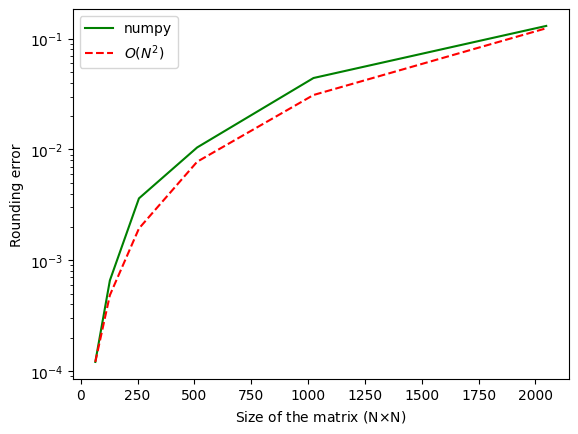

In [9]:
# Plotting the results
N = [64, 128, 256, 512, 1024, 2048]
fig, ax = plt.subplots()
ax.plot(N, error_numpy, label = "numpy", color = "green")
# O(N^2) normalized by the error at N = 64
ax.plot(N, (np.array(N)**2)*error_numpy[0]/(N[0]**2), label = r"$O(N^2)$", color = "red", linestyle = "--")
ax.set_yscale("log")
ax.set_xlabel(r"Size of the matrix (N$\times$N)")
ax.set_ylabel("Rounding error")
ax.legend()
plt.show()

2.2 - 3) How does the rounding error grow by increasing N? Linearly, quadratically, cubically, exponentially, ...? Why is that? Hint: think about the complexity/number of operations needed.

## Answer 2.2 - 3)
2.2 - 3) The error grows quadratically with the size of the matrix. This is because for each term in the matrix-matrix multiplication, there are N multiplications and N-1 additions, leading to an accumulation of rounding errors of the order of N^2. While the matematical complexity of the matrix-matrix multiplication is O(N^3), the error growth is O(N^2) due to the accumulation of rounding errors in the N^2 calculations for each entry of the result matrix.